## Dimensionality reduction for video + wheel

In [1]:
import os
import numpy as np
from one.api import ONE
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import brainbox.behavior.wheel as wh
from mpl_toolkits.mplot3d import Axes3D

# --Machine learning and statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Functions/'
#functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/'
os.chdir(functions_path)
from video_functions import get_dlc_XYs, get_raw_and_smooth_position, get_pupil_diameter, pupil_center, nose_tip, tongue_tip, left_paw, right_paw, get_pupil_diameter

functions_path =  '/home/ines/repositories/representation_learning_variability/Models/Sub-trial/1_preprocess_data/proficient/'
#functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Functions/'
os.chdir(functions_path)
from design_functions import lick_rate, wheel_velocity, wheel_displacement, pupil_diam, cont_bin


### Get sessions from mice of interest

In [2]:
data_path =  '/home/ines/repositories/representation_learning_variability/Video/'
#data_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability/Video/'

os.chdir(data_path)

mice = pickle.load(open("subject_intersection", "rb"))
naive_sessions = pickle.load(open("good_naive_sessions", "rb"))

### Get XY video coordinates and wheel position

In [3]:
one = ONE()
example_session = 'cb2ad999-a6cb-42ff-bf71-1774c57e5308'

# Trials data
session_trials = one.load_object(example_session, obj='trials', namespace='ibl')
session_trials = session_trials.to_df()

# Wheel positions
wheel = one.load_object(example_session, 'wheel', collection='alf')
wheelMoves = one.load_object(example_session, 'wheelMoves', collection='alf')

# Get wheel data for that session
wheel_pos, wheel_time = wh.interpolate_position(wheel.timestamps, wheel.position)
    
# Video XYs
video_time, XYs = get_dlc_XYs(example_session, view='left', likelihood_thresh=0.9)

In [4]:
bin_size = 0.1

### Process data

In [5]:
# Pupil diam
pupil_dia_raw, pupil_dia_smooth, _, _ = (
    get_raw_and_smooth_position(example_session, video_type='left', ephys=False, position_function=get_pupil_diameter))
# Pupil position
pupil_X_raw, pupil_X_smooth, pupil_Y_raw, pupil_Y_smooth  = (
    get_raw_and_smooth_position(example_session, video_type='left', ephys=False, position_function=pupil_center))
# Nose tip
nose_X_raw, nose_X_smooth, nose_Y_raw, nose_Y_smooth  = (
    get_raw_and_smooth_position(example_session, video_type='left', ephys=False, position_function=nose_tip))
# Tongue tip
tongue_X_raw, tongue_X_smooth, tongue_Y_raw, tongue_Y_smooth  = (
    get_raw_and_smooth_position(example_session, video_type='left', ephys=False, position_function=tongue_tip))
# Left paw
l_paw_X_raw, l_paw_X_smooth, l_paw_Y_raw, l_paw_Y_smooth  = (
    get_raw_and_smooth_position(example_session, video_type='left', ephys=False, position_function=left_paw))
# Right paw
r_paw_X_raw, r_paw_X_smooth, r_paw_Y_raw, r_paw_Y_smooth  = (
    get_raw_and_smooth_position(example_session, video_type='left', ephys=False, position_function=tongue_tip))


/home/ines/miniconda3/envs/iblenv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:357: RuntimeWarning: Mean of empty slice
  X = np.nanmean(np.stack((l[:, 0], r[:, 0]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:358: RuntimeWarning: Mean of empty slice
  Y = np.nanmean(np.stack((t[:, 1], b[:, 1]), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:378: RuntimeWarning: Mean of empty slice
  X = np.nanmean(np.stack((left_tongue, right_tongue), axis=0), axis=0)
/home/ines/repositories/representation_learning_variability/Functions/video_functions.py:379: RuntimeWarning: Mean of empty slice
  Y = np.nanmean(np.stack((left_tongue, right_tongue), axis=0), axis=0)
/h

In [6]:
pupil_diam = cont_bin(video_time, pupil_dia_smooth, session_trials, bin_size)
pupil_diam = pupil_diam.rename(columns={'Values': 'Pupil_diameter'})

pupil_X = cont_bin(video_time, pupil_X_smooth, session_trials, bin_size)
pupil_X = pupil_X.rename(columns={'Values': 'Pupil_X'})

pupil_Y = cont_bin(video_time, pupil_Y_smooth, session_trials, bin_size)
pupil_Y = pupil_Y.rename(columns={'Values': 'Pupil_Y'})

nose_X = cont_bin(video_time, nose_X_smooth, session_trials, bin_size)
nose_X = nose_X.rename(columns={'Values': 'Nose_X'})

nose_Y = cont_bin(video_time, nose_Y_smooth, session_trials, bin_size)
nose_Y = nose_Y.rename(columns={'Values': 'Nose_Y'})

tongue_X = cont_bin(video_time, tongue_X_smooth, session_trials, bin_size)
tongue_X = tongue_X.rename(columns={'Values': 'Tongue_X'})

tongue_Y = cont_bin(video_time, tongue_Y_smooth, session_trials, bin_size)
tongue_Y = tongue_Y.rename(columns={'Values': 'Tongue_Y'})

l_paw_X = cont_bin(video_time, l_paw_X_smooth, session_trials, bin_size)
l_paw_X = l_paw_X.rename(columns={'Values': 'l_paw_X'})

l_paw_Y = cont_bin(video_time, l_paw_Y_smooth, session_trials, bin_size)
l_paw_Y = l_paw_Y.rename(columns={'Values': 'l_paw_Y'})

r_paw_X = cont_bin(video_time, r_paw_X_smooth, session_trials, bin_size)
r_paw_X = r_paw_X.rename(columns={'Values': 'r_paw_X'})

r_paw_Y = cont_bin(video_time, r_paw_Y_smooth, session_trials, bin_size)
r_paw_Y = r_paw_Y.rename(columns={'Values': 'r_paw_Y'})

wheel = cont_bin(wheel_time, wheel_pos, session_trials, bin_size)
wheel = wheel.rename(columns={'Values': 'wheel'})


In [48]:
# TODO: merge wheel data!
merged_df = pupil_diam.merge(pupil_X ,on=['Bin', 'Trial'], how='outer')
merged_df = merged_df.merge(pupil_Y ,on=['Bin', 'Trial'], how='outer')
merged_df = merged_df.merge(nose_X ,on=['Bin', 'Trial'], how='outer')
merged_df = merged_df.merge(nose_Y ,on=['Bin', 'Trial'], how='outer')
merged_df = merged_df.merge(tongue_X ,on=['Bin', 'Trial'], how='outer')
merged_df = merged_df.merge(tongue_Y ,on=['Bin', 'Trial'], how='outer')
merged_df = merged_df.merge(l_paw_X ,on=['Bin', 'Trial'], how='outer')
merged_df = merged_df.merge(l_paw_Y ,on=['Bin', 'Trial'], how='outer')
merged_df = merged_df.merge(r_paw_X ,on=['Bin', 'Trial'], how='outer')
merged_df = merged_df.merge(r_paw_Y ,on=['Bin', 'Trial'], how='outer')
merged_df = merged_df.merge(wheel, on=['Bin', 'Trial'], how='outer')

In [50]:
merged_df.drop_duplicates(subset=['Trial', 'Bin'])

,Bin,Trial,Pupil_diameter,Pupil_X,Pupil_Y,Nose_X,Nose_Y,Tongue_X,Tongue_Y,l_paw_X,l_paw_Y,r_paw_X,r_paw_Y,wheel
0,140.0,0.0,11.606669,495.819171,129.499580,221.982446,232.184547,369.701046,369.701046,477.491704,450.362766,369.701046,369.701046,-0.623753
1,141.0,0.0,11.809959,495.935438,127.107611,225.193401,230.915084,365.881990,365.881990,480.041648,450.918846,365.881990,365.881990,-0.623412
2,142.0,0.0,12.105162,495.993727,125.671957,229.389201,229.973891,362.062934,362.062934,485.943901,456.229666,362.062934,362.062934,-0.619779
3,143.0,0.0,12.234194,496.161197,125.573086,233.557650,229.019361,358.243878,358.243878,488.408300,458.573534,358.243878,358.243878,-0.506319
4,144.0,0.0,12.788286,496.010849,127.597138,237.859430,228.186145,354.424821,354.424821,492.050758,462.163921,354.424821,354.424821,-0.333735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44900,41279.0,831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.059397
44901,41381.0,834.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.512559
44902,42101.0,845.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.107308
44903,42897.0,850.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.940123


## PCA

In [51]:
no_use_var = ['Trial', 'Bin']  # original results
clean_data = merged_df.dropna()
matrix = clean_data.drop(columns=no_use_var)
ref_df = clean_data[no_use_var]


In [52]:

"""
PRINCIPLE COMPONENT ANALYSES
"""

X_df = matrix.dropna()
X = np.array(X_df) # (n_samples, n_features)

# Mean centered and equal variance (redundant code)
scaler = StandardScaler()
scaler.fit(X)

pca = PCA() # svd_solver='full'
#pca.fit(scaler.transform(X))
X_reduced = pca.fit_transform(scaler.transform(X))

# Plot projections of datapoints into first 3 principal components
ref_df['pc1'] = X_reduced[:, 0].transpose()
ref_df['pc2'] = X_reduced[:, 1].transpose()
ref_df['pc3'] = X_reduced[:, 2].transpose()
ref_df['pc4'] = X_reduced[:, 3].transpose()
ref_df['pc5'] = X_reduced[:, 4].transpose()
ref_df['pc6'] = X_reduced[:, 5].transpose()
ref_df['pc7'] = X_reduced[:, 6].transpose()
ref_df['pc8'] = X_reduced[:, 7].transpose()
ref_df['pc9'] = X_reduced[:, 8].transpose()
ref_df['pc10'] = X_reduced[:, 9].transpose()
ref_df['pc11'] = X_reduced[:, 10].transpose()
ref_df['pc12'] = X_reduced[:, 11].transpose()

/tmp/ipykernel_9569/512739027.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_df['pc1'] = X_reduced[:, 0].transpose()
/tmp/ipykernel_9569/512739027.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ref_df['pc2'] = X_reduced[:, 1].transpose()
/tmp/ipykernel_9569/512739027.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [53]:
ref_df

,Trial,Bin,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,0.0,140.0,-14.100971,1.617609,1.292792,1.647211,0.122882,-1.349227,0.161073,0.636971,0.436838,9.329041e-15,-4.864945e-15,1.068521e-15
1,0.0,141.0,-12.957764,0.989906,1.206252,1.252581,0.389106,-1.479190,-0.282961,0.634475,0.324073,2.226978e-15,-6.937538e-15,-3.517231e-16
2,0.0,142.0,-11.816345,0.464027,1.019856,0.992957,0.665114,-1.435349,-0.615351,0.423483,0.033185,-1.113233e-16,7.875338e-16,4.532679e-17
3,0.0,143.0,-10.698690,-0.035036,0.783293,1.001867,0.883711,-1.246801,-0.641267,0.318769,-0.171490,2.992612e-15,-1.817829e-15,3.482939e-16
4,0.0,144.0,-9.586633,-0.280024,0.405236,1.379419,1.149682,-0.654896,-0.435867,0.080341,-0.376016,-3.356945e-15,1.631990e-15,-3.578876e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44786,870.0,44177.0,1.846510,-0.142613,-0.720122,0.383293,0.303413,-1.266471,1.570448,-0.183586,0.409838,5.903602e-17,-6.294197e-18,1.171737e-18
44787,870.0,44178.0,1.931107,-0.166873,-0.771029,0.428812,0.285092,-1.266206,1.536500,-0.158496,0.356606,8.996663e-17,-2.145467e-16,-3.187519e-17
44788,870.0,44179.0,2.016076,-0.115153,-0.954856,0.634592,0.242612,-1.230028,1.225935,-0.065867,0.316953,2.598451e-17,-1.145577e-16,-8.205963e-17
44789,870.0,44180.0,2.101234,-0.047775,-1.132187,0.839487,0.130621,-1.256281,0.993320,0.012510,0.289830,2.328252e-17,-1.292106e-16,-8.229552e-17


Text(0, 0.5, '% Variance explained')

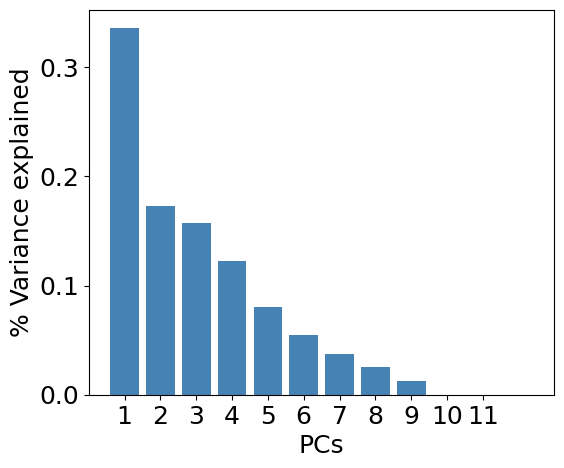

In [54]:
# Plot variance explained per principle component
fig, ax = plt.subplots(figsize=[6,5])
plt.rc('font', size=18)
keep_pc = np.shape(X)[1]
plt.bar(np.arange(1, keep_pc+1, 1), pca.explained_variance_ratio_[0:keep_pc], color='steelblue')
plt.xticks(np.arange(1, keep_pc, 1))
#plt.xlim([0, 3])
plt.xlabel('PCs')
plt.ylabel('% Variance explained')

<AxesSubplot: xlabel='pc1', ylabel='pc2'>

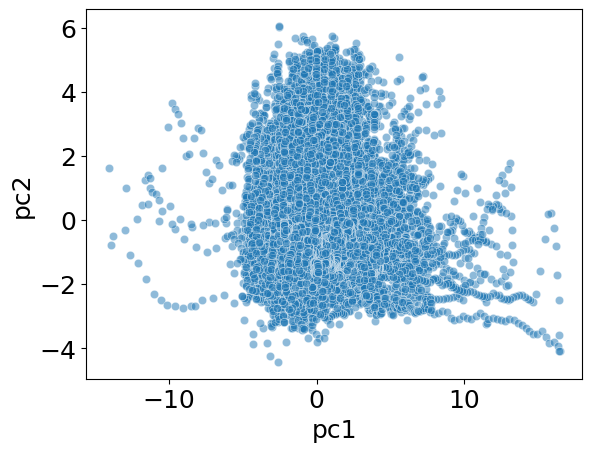

In [55]:
sns.scatterplot(x='pc1', y='pc2', data=ref_df, alpha=0.5)

In [56]:
data_path =  '/home/ines/repositories/representation_learning_variability/DATA/Sub-trial/Design matrix'

os.chdir(data_path)

pickle.dump(ref_df, open("design_matrix_dim_reduc", "wb"))

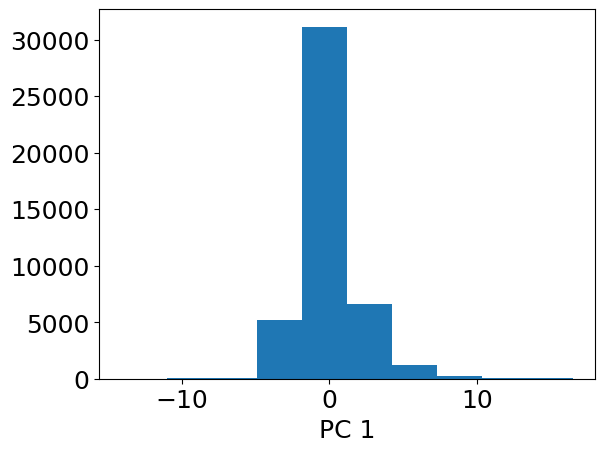

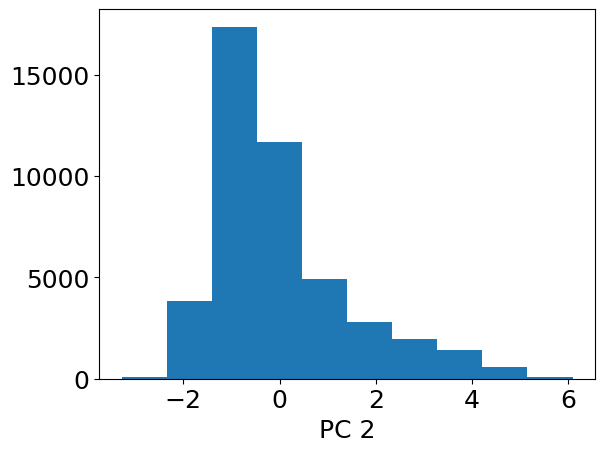

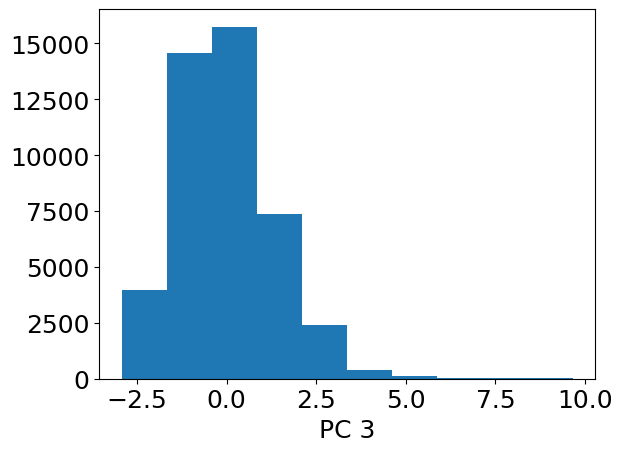

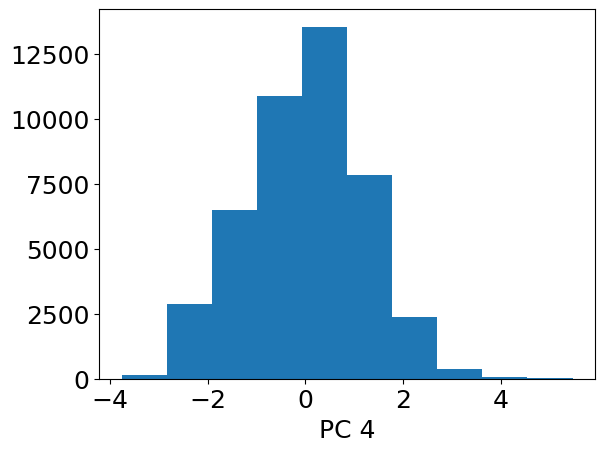

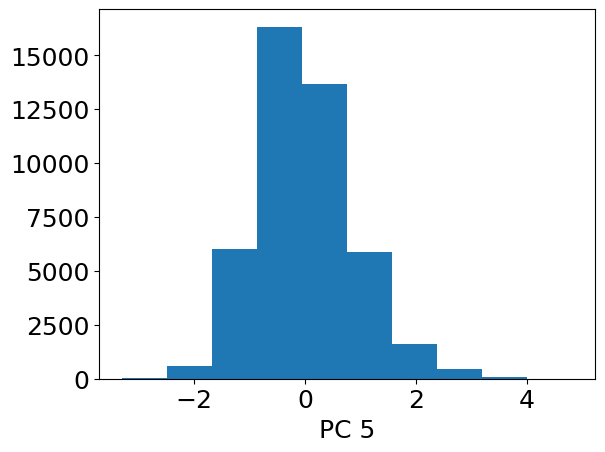

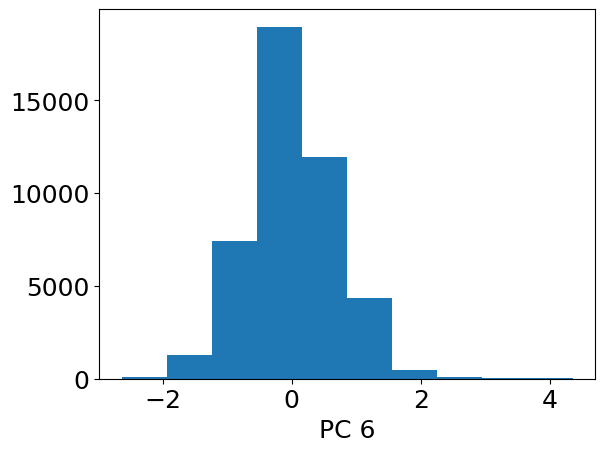

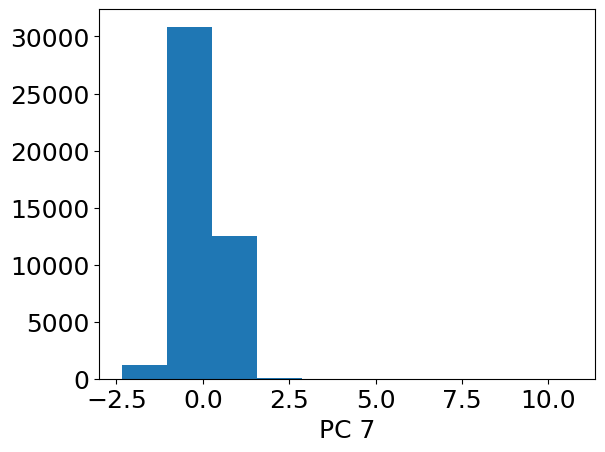

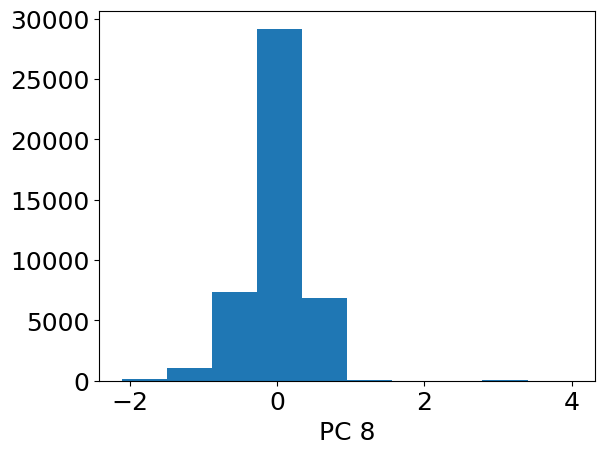

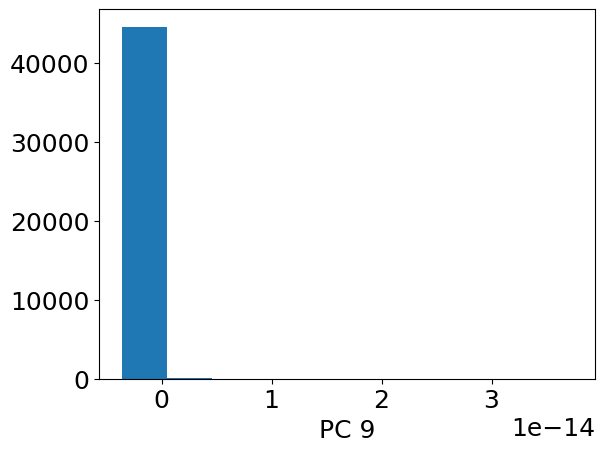

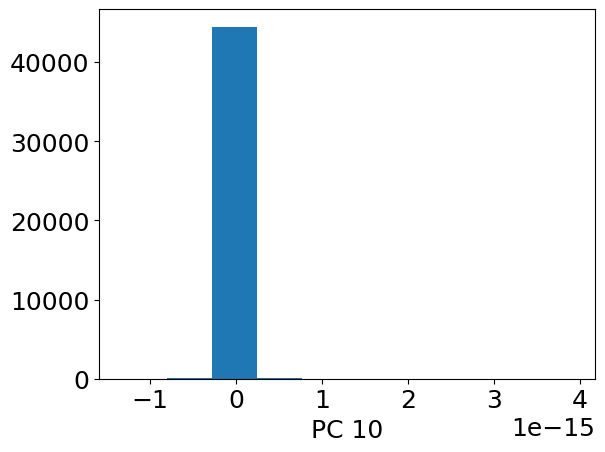

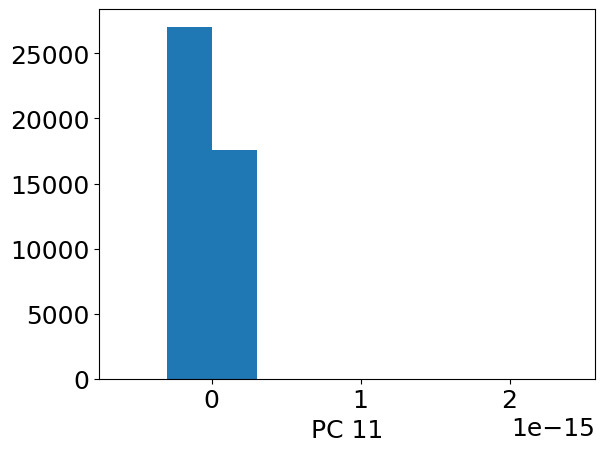

In [28]:
plt.hist(X_reduced[:,0])
plt.xlabel('PC 1')
plt.show()

plt.hist(X_reduced[:,1])
plt.xlabel('PC 2')
plt.show()

plt.hist(X_reduced[:,2])
plt.xlabel('PC 3')
plt.show()

plt.hist(X_reduced[:,3])
plt.xlabel('PC 4')
plt.show()

plt.hist(X_reduced[:,4])
plt.xlabel('PC 5')
plt.show()

plt.hist(X_reduced[:,5])
plt.xlabel('PC 6')
plt.show()

plt.hist(X_reduced[:,6])
plt.xlabel('PC 7')
plt.show()

plt.hist(X_reduced[:,7])
plt.xlabel('PC 8')
plt.show()

plt.hist(X_reduced[:,8])
plt.xlabel('PC 9')
plt.show()

plt.hist(X_reduced[:,9])
plt.xlabel('PC 10')
plt.show()

plt.hist(X_reduced[:,10])
plt.xlabel('PC 11')
plt.show()

In [31]:
pickle.dump(ref_df, open("design_matrix_dim_reduc_"+str(bin_size), "wb"))

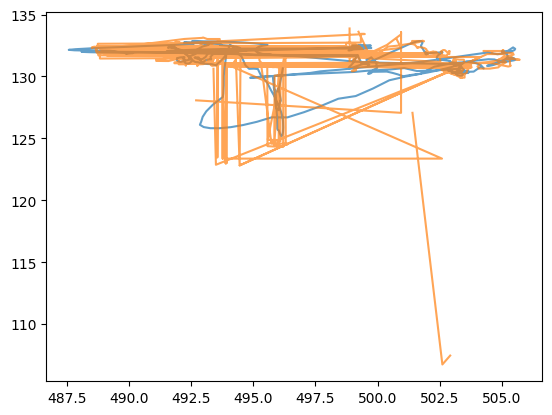

In [19]:
plt.plot(pupil_X_smooth[0:1000], pupil_Y_smooth[0:1000], alpha=0.7)
plt.plot(pupil_X_raw[0:1000], pupil_Y_raw[0:1000], alpha=0.7)

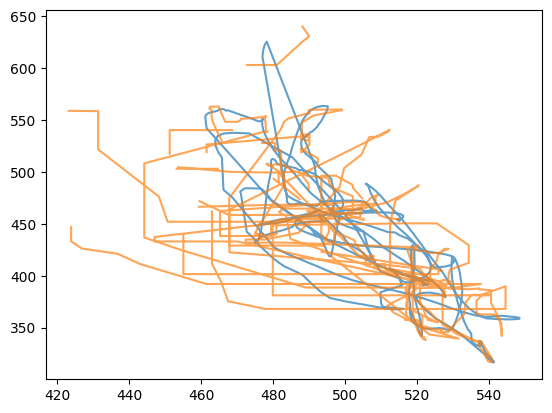

In [22]:
plt.plot(l_paw_X_smooth[0:1000], l_paw_Y_smooth[0:1000], alpha=0.7)
plt.plot(l_paw_X_raw[0:1000], l_paw_Y_raw[0:1000], alpha=0.7)